Let us check that Wilke-Shapiro test, Henze-Zirkler test, and qq-plots work for synthetic multivariate data.
We will focus on trying these tests on small number of samples ~100.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pingouin as pg
from scipy import stats
from scipy.spatial import distance

# load data
from data_fns import load_V1_Marius, load_V1_Marius_whitenoise, load_V1_Marius_DHT, load_V1_Ringach

data_dir = 'data/V1_data_Marius/'
rf_data_wn, snr_wn, dim_wn = load_V1_Marius_whitenoise(data_dir, centered=True, normalized=False)
rf_data_dht, snr_dht, dim_dht = load_V1_Marius_DHT(data_dir, centered=True, normalized=False)
rf_data_ni, snr_ni, dim_ni = load_V1_Marius(data_dir, centered=True, normalized=False)
rf_data_ringach = load_V1_Ringach('data/V1_data_Ringach/', centered=True, normalized=False)

/home/bpandey/anaconda3/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedCacheFailedWarning: Failed to use cache while checking for outdated package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/home/bpandey/anaconda3/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


### Check normality for data with diagonal covariance matrix

HZ test: hz statistic: 1.00, p-value nan, Data is normal? False
WS test: ws statistic: 1.00, p-value 1.00. Data is normal? True


/home/bpandey/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


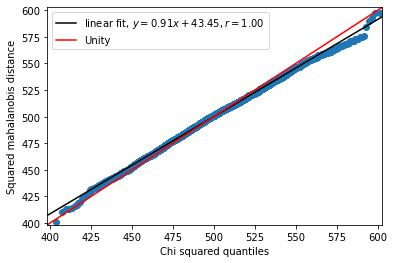

In [4]:
dim = 500
num_samples = 3000
cov_mat = np.eye(dim)
W = np.random.multivariate_normal(mean=np.zeros(dim), cov=cov_mat, size=num_samples)


# HZ test
hz, pval, normal = pg.multivariate_normality(W, alpha=0.05)
print('HZ test: hz statistic: {:.2f}, p-value {:.2f}, Data is normal? {}'.format(hz, pval, normal))

# Shapiro test
ws, pval = stats.shapiro(W)
normal = True if pval > 0.05 else False 
print('WS test: ws statistic: {:.2f}, p-value {:.2f}. Data is normal? {}'.format(ws, pval, normal))

# qq-plot
mu = np.mean(W, axis=0).reshape(1, -1)
dist = distance.cdist(W, mu, 'mahalanobis') ** 2
(osm, osr), (slope, intercept, r) = stats.probplot(dist.flatten(), sparams=dim, dist=stats.chi2)
t = np.arange(0, np.max(osm), 0.5)
fig = plt.figure()
plt.plot(osm, osr, 'o')
plt.xlim(np.min(osr), np.max(osr))
plt.ylim(np.min(osr), np.max(osr))
plt.plot(t, slope * t + intercept, 'k-', label=r'linear fit, $y={:.2f}x + {:.2f}, r={:.2f}$'.format(slope, intercept, r))
plt.plot(t, t, 'r-', label='Unity')
plt.xlabel('Chi squared quantiles')
plt.ylabel('Squared mahalanobis distance')
plt.legend()

### Check normality for data with diagonal covariance matrix w/ small noise

<ipython-input-6-50f0f67c8c3c>:8: RuntimeWarning: covariance is not positive-semidefinite.
  W = np.random.multivariate_normal(mean=np.zeros(dim), cov=cov_mat, size=num_samples)


HZ test: hz statistic: 1.00, p-value nan, Data is normal? False
WS test: ws statistic: 1.00, p-value 0.00. Data is normal? False


/home/bpandey/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


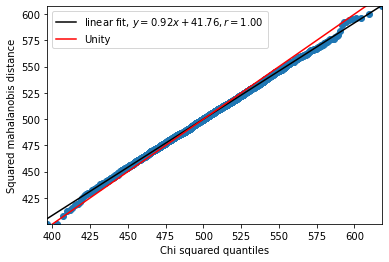

In [6]:
from sklearn.decomposition import PCA

dim = 500
num_samples = 3000
identity = np.eye(dim)
noise = distance.squareform(np.random.normal(0, 0.25, size=int(dim * (dim - 1) / 2)))
cov_mat = identity + noise
W = np.random.multivariate_normal(mean=np.zeros(dim), cov=cov_mat, size=num_samples)

# PCA whitening
W -= np.mean(W, axis=0)
W /= np.std(W, axis=0)
pca = PCA(whiten=True)
W = pca.fit_transform(W)

# HZ test
hz, pval, normal = pg.multivariate_normality(W, alpha=0.05)
print('HZ test: hz statistic: {:.2f}, p-value {:.2f}, Data is normal? {}'.format(hz, pval, normal))

# Shapiro test
ws, pval = stats.shapiro(W)
normal = True if pval > 0.05 else False 
print('WS test: ws statistic: {:.2f}, p-value {:.2f}. Data is normal? {}'.format(ws, pval, normal))

# qq-plot
mu = np.mean(W, axis=0).reshape(1, -1)
dist = distance.cdist(W, mu, 'mahalanobis') ** 2
(osm, osr), (slope, intercept, r) = stats.probplot(dist.flatten(), sparams=dim, dist=stats.chi2)
t = np.arange(0, np.max(osm), 0.5)
fig = plt.figure()
plt.plot(osm, osr, 'o')
plt.plot(t, slope * t + intercept, 'k-', label=r'linear fit, $y={:.2f}x + {:.2f}, r={:.2f}$'.format(slope, intercept, r))
plt.plot(t, t, 'r-', label='Unity')
plt.xlim(np.min(osm), np.max(osm))
plt.ylim(np.min(osr), np.max(osr))
plt.xlabel('Chi squared quantiles')
plt.ylabel('Squared mahalanobis distance')
plt.legend()

### Check normality for data with arbitrary covariance matrix

<ipython-input-8-e567edfee1f3>:8: RuntimeWarning: covariance is not positive-semidefinite.
  W = np.random.multivariate_normal(mean=np.zeros(dim), cov=cov_mat, size=num_samples)


HZ test: hz statistic: 1.00, p-value nan, Data is normal? False
WS test: ws statistic: 1.00, p-value 1.00. Data is normal? True


/home/bpandey/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


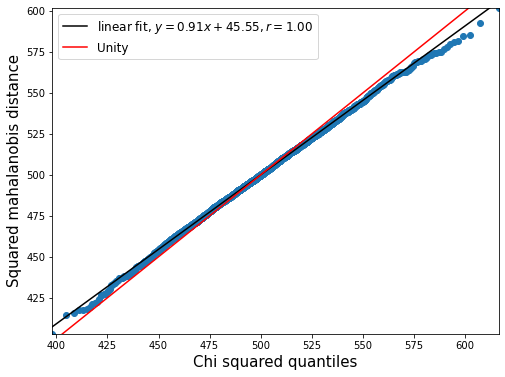

In [8]:
from sklearn.decomposition import PCA 

dim = 500
num_samples = 2500
identity = np.eye(dim)
noise = distance.squareform(np.random.uniform(0, 1, size=int(dim * (dim - 1) / 2)))
cov_mat = identity + noise
W = np.random.multivariate_normal(mean=np.zeros(dim), cov=cov_mat, size=num_samples)

# PCA whitening
W -= np.mean(W, axis=0)
W /= np.std(W, axis=0)
pca = PCA(whiten=True)
W = pca.fit_transform(W)

# HZ test
hz, pval, normal = pg.multivariate_normality(W, alpha=0.05)
print('HZ test: hz statistic: {:.2f}, p-value {:.2f}, Data is normal? {}'.format(hz, pval, normal))

# Shapiro test
ws, pval = stats.shapiro(W)
normal = True if pval > 0.05 else False 
print('WS test: ws statistic: {:.2f}, p-value {:.2f}. Data is normal? {}'.format(ws, pval, normal))

## qq-plot
mu = np.mean(W, axis=0).reshape(1, -1)
dist = distance.cdist(W, mu, 'mahalanobis') ** 2
(osm, osr), (slope, intercept, r) = stats.probplot(dist.flatten(), sparams=dim, dist=stats.chi2)
t = np.arange(0, np.max(osm), 0.5)
fig = plt.figure(figsize=(8, 6))
plt.plot(osm, osr, 'o')
plt.plot(t, slope * t + intercept, 'k-', label=r'linear fit, $y={:.2f}x + {:.2f}, r={:.2f}$'.format(slope, intercept, r))
plt.plot(t, t, 'r-', label='Unity')
plt.xlim(np.min(osm), np.max(osm))
plt.ylim(np.min(osr), np.max(osr))
plt.xlabel('Chi squared quantiles', fontsize=15)
plt.ylabel('Squared mahalanobis distance', fontsize=15)
plt.legend(fontsize=12)
# plt.savefig('results/V1_data/normality_tests/qq_plot_arbitrary_cov_mat.pdf')

### Check normality for receptive fields generated from V1 covariance matrix

HZ test: hz statistic: 1.00, p-value nan, Data is normal? False
WS test: ws statistic: 1.00, p-value 0.00. Data is normal? False


/home/bpandey/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


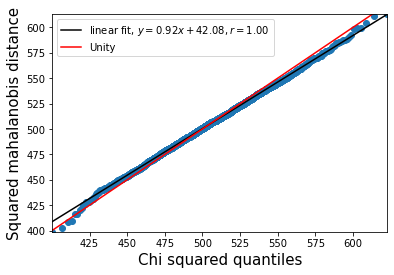

In [9]:
## check for V1 covariance matrix
from sklearn.decomposition import PCA
from estimator import V1_inspired_kernel_matrix, V1_inspired_weights_same_center
import numpy.linalg as la

dim = (14, 36)
num_samples = 3000
W = V1_inspired_weights_same_center(num_samples, dim, s=1.93, f=0.68, center=(7, 18), scale=1)

# PCA whitening
W -= np.mean(W, axis=0)
W /= np.std(W, axis=0)
pca = PCA(whiten=True)
W = pca.fit_transform(W)

# HZ test
hz, pval, normal = pg.multivariate_normality(W, alpha=0.05)
print('HZ test: hz statistic: {:.2f}, p-value {:.2f}, Data is normal? {}'.format(hz, pval, normal))

# Shapiro test
ws, pval = stats.shapiro(W)
normal = True if pval > 0.05 else False 
print('WS test: ws statistic: {:.2f}, p-value {:.2f}. Data is normal? {}'.format(ws, pval, normal))

# qq-plot
mu = np.mean(W, axis=0).reshape(1, -1)
dist = distance.cdist(W, mu, 'mahalanobis') ** 2
(osm, osr), (slope, intercept, r) = stats.probplot(dist.flatten(), sparams=dim[0] * dim[1], dist=stats.chi2)
t = np.arange(0, np.max(osm), 0.5)
fig = plt.figure()
plt.plot(osm, osr, 'o')
plt.plot(t, slope * t + intercept, 'k-', label=r'linear fit, $y={:.2f}x + {:.2f}, r={:.2f}$'.format(slope, intercept, r))
plt.plot(t, t, 'r-', label='Unity')
plt.xlim(np.min(osm), np.max(osm))
plt.ylim(np.min(osr), np.max(osr))
plt.xlabel('Chi squared quantiles', fontsize=15)
plt.ylabel('Squared mahalanobis distance', fontsize=15)
plt.legend()
# plt.savefig('results/V1_data/normality_tests/qq_plot_V1_cov_mat.pdf')

### Check normality for V1 data from Marius w/ white noise

(8358, 504)
HZ test: hz statistic: 1.00, p-value nan, Data is normal? False


/home/bpandey/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


WS test: ws statistic: 1.00, p-value 1.00. Data is normal? True


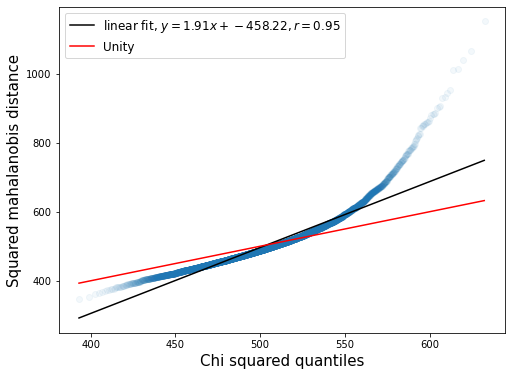

In [10]:
# check for real data
from sklearn.decomposition import PCA
from data_fns import load_V1_Marius_whitenoise

rf = rf_data_wn[snr_wn > 0.4]
print(rf.shape)

# select random cells
# rf = rf[:3000]
# rf = rf[:, np.random.choice(500, 450, replace=False)]
# rf = rf_data_wn[np.random.randint(len(rf_data_wn), size=6000)]

# PCA whitening
W = rf - np.mean(rf, axis=0)
W /= np.std(W, axis=0)
pca = PCA(whiten=True)
W = pca.fit_transform(W)
# W = np.sqrt(W)

# HZ test
hz, pval, normal = pg.multivariate_normality(W, alpha=0.05)
print('HZ test: hz statistic: {:.2f}, p-value {:.2f}, Data is normal? {}'.format(hz, pval, normal))

# Shapiro test
ws, pval = stats.shapiro(W)
normal = True if pval > 0.05 else False 
print('WS test: ws statistic: {:.2f}, p-value {:.2f}. Data is normal? {}'.format(ws, pval, normal))

# qq-plot
mu = np.mean(W, axis=0).reshape(1, -1)
dist = distance.cdist(W, mu, 'mahalanobis') ** 2
(osm, osr), (slope, intercept, r) = stats.probplot(dist.flatten(), sparams=dim_wn[0] * dim_wn[1], dist=stats.chi2)
t = np.arange(np.min(osm), np.max(osm), 0.5)
fig = plt.figure(figsize=(8, 6))
plt.plot(osm, osr, 'o', alpha=0.05)
plt.plot(t, slope * t + intercept, 'k-', label=r'linear fit, $y={:.2f}x + {:.2f}, r={:.2f}$'.format(slope, intercept, r))
plt.plot(t, t, 'r-', label='Unity')
plt.xlabel('Chi squared quantiles', fontsize=15)
plt.ylabel('Squared mahalanobis distance', fontsize=15)
plt.legend(fontsize=12)
# plt.savefig('results/V1_data/normality_tests/qq_plot_Marius_whitenoise.pdf')

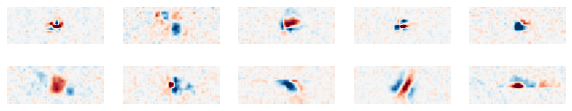

In [17]:
rf_large_dist = rf[dist.flatten() > 600]
rf_small_dist = rf[dist.flatten() < 600]

fig = plt.figure(figsize=(10, 2))
for i in range(5):
    ax = fig.add_subplot(2, 5, i + 1)
    idx = np.random.randint(len(rf_small_dist))
    cell = rf_small_dist[idx]
    cell = (cell - np.mean(cell)) / np.std(cell)
    plt.imshow(cell.reshape(14, 36), cmap='RdBu')
    plt.clim(-5, 5)
    plt.axis('off')
    
    ax = fig.add_subplot(2, 5, 5 + i + 1)
    idx = np.random.randint(len(rf_large_dist))
    cell = rf_large_dist[idx]
    cell = (cell - np.mean(cell)) / np.std(cell)
    plt.imshow(cell.reshape(14, 36), cmap='RdBu')
    plt.clim(-5, 5)
    plt.axis('off')

### Check normality for V1 data from Marius w/ natural images


(10782, 648)
HZ test: hz statistic: 1.00, p-value nan, Data is normal? False


/home/bpandey/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


WS test: ws statistic: 1.01, p-value 1.00. Data is normal? True


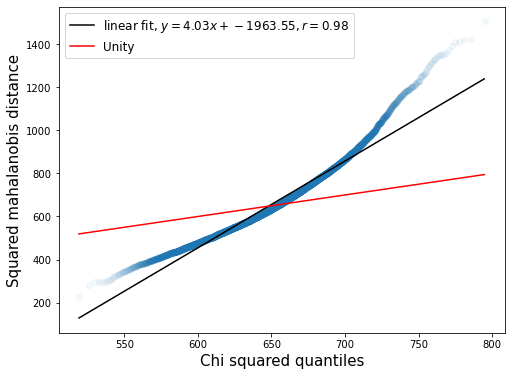

In [18]:
from sklearn.decomposition import PCA
from data_fns import load_V1_Marius

rf = np.mean(rf_data_ni[:, snr_ni > 0.4, :], axis=0)
num_cells, dim = rf.shape
print((num_cells, dim))

# PCA whitening
W = rf - np.mean(rf, axis=0)
W /= np.std(W, axis=0)
pca = PCA(whiten=True)
W = pca.fit_transform(W)

# HZ test
hz, pval, normal = pg.multivariate_normality(W, alpha=0.05)
print('HZ test: hz statistic: {:.2f}, p-value {:.2f}, Data is normal? {}'.format(hz, pval, normal))

# Shapiro test
ws, pval = stats.shapiro(W)
normal = True if pval > 0.05 else False 
print('WS test: ws statistic: {:.2f}, p-value {:.2f}. Data is normal? {}'.format(ws, pval, normal))


# qq-plot
mu = np.mean(W, axis=0).reshape(1, -1)
dist = distance.cdist(W, mu, 'mahalanobis') ** 2
(osm, osr), (slope, intercept, r) = stats.probplot(dist.flatten(), sparams=dim_ni[0] * dim_ni[1], dist=stats.chi2)
t = np.arange(np.min(osm), np.max(osm), 0.5)
fig = plt.figure(figsize=(8, 6))
plt.plot(osm, osr, 'o', alpha=0.05)
plt.plot(t, slope * t + intercept, 'k-', label=r'linear fit, $y={:.2f}x + {:.2f}, r={:.2f}$'.format(slope, intercept, r))
plt.plot(t, t, 'r-', label='Unity')
# plt.xlim(np.min(osm), np.max(osm))
# plt.ylim(np.min(osr), np.max(osr))
plt.xlabel('Chi squared quantiles', fontsize=15)
plt.ylabel('Squared mahalanobis distance', fontsize=15)
plt.legend(fontsize=12)
# plt.savefig('results/V1_data/normality_tests/qq_plot_Marius_natural_images.pdf')

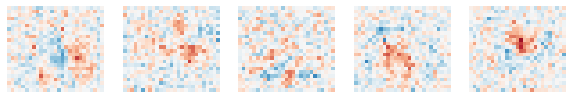

In [19]:
fig = plt.figure(figsize=(10, 2))
for i in range(5):
    ax = fig.add_subplot(1, 5, i + 1)
    idx = np.random.randint(len(rf))
    cell = rf[idx]
    cell = (cell - np.mean(cell)) / np.std(cell)
    plt.imshow(cell.reshape(24, 27), cmap='RdBu')
    plt.clim(-5, 5)
    plt.axis('off')

### Check normality for V1 data from Marius w/ DHT



HZ test: hz statistic: 1.00, p-value nan, Data is normal? False


/home/bpandey/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


WS test: ws statistic: 0.99, p-value 0.00. Data is normal? False


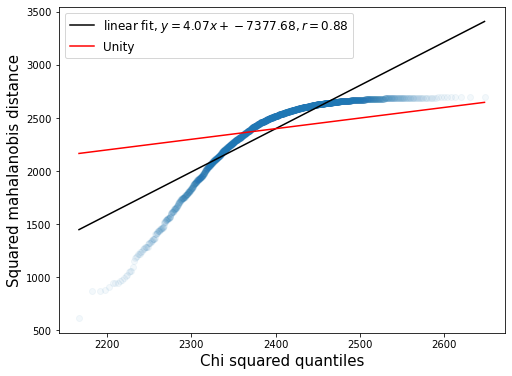

In [20]:
# check for real data
from sklearn.decomposition import PCA
from data_fns import load_V1_Marius_DHT

rf = rf_data_dht[snr_dht > 1]

# PCA whitening
W = rf - np.mean(rf, axis=0)
W /= np.std(W, axis=0)
pca = PCA(whiten=True)
W = pca.fit_transform(W)

# HZ test
hz, pval, normal = pg.multivariate_normality(W, alpha=0.05)
print('HZ test: hz statistic: {:.2f}, p-value {:.2f}, Data is normal? {}'.format(hz, pval, normal))

# Shapiro test
ws, pval = stats.shapiro(W)
normal = True if pval > 0.05 else False 
print('WS test: ws statistic: {:.2f}, p-value {:.2f}. Data is normal? {}'.format(ws, pval, normal))


# qq-plot
mu = np.mean(W, axis=0).reshape(1, -1)
dist = distance.cdist(W, mu, 'mahalanobis') ** 2
(osm, osr), (slope, intercept, r) = stats.probplot(dist.flatten(), sparams=dim_dht[0] * dim_dht[1], dist=stats.chi2)
t = np.arange(np.min(osm), np.max(osm), 0.5)

fig = plt.figure(figsize=(8, 6))
plt.plot(osm, osr, 'o', alpha=0.05)
plt.plot(t, slope * t + intercept, 'k-', label=r'linear fit, $y={:.2f}x + {:.2f}, r={:.2f}$'.format(slope, intercept, r))
plt.plot(t, t, 'r-', label='Unity')
# plt.xlim(np.min(osm) - 100, np.max(osm)+ 100)
# plt.ylim(np.min(osr) - 100, np.max(osr) + 100)
plt.xlabel('Chi squared quantiles',fontsize=15)
plt.ylabel('Squared mahalanobis distance',fontsize=15)
plt.legend(fontsize=12)
# plt.savefig('results/V1_data/normality_tests/qq_plot_Marius_DHT.pdf')

### Check result for Ringach data

In [21]:
from sklearn.decomposition import PCA
import numpy.linalg as la

rf = rf_data_ringach.copy()

# PCA whitening
W = rf - np.mean(rf, axis=0)
W /= np.std(W, axis=0)
# pca = PCA(whiten=True)
# W = pca.fit_transform(W)

# HZ test
hz, pval, normal = pg.multivariate_normality(W, alpha=0.05)
print('HZ test: hz statistic: {:.2f}, p-value {:.2f}, Data is normal? {}'.format(hz, pval, normal))

# Shapiro test
ws, pval = stats.shapiro(W)
normal = True if pval > 0.05 else False 
print('WS test: ws statistic: {:.2f}, p-value {:.2f}. Data is normal? {}'.format(ws, pval, normal))

HZ test: hz statistic: 1000.00, p-value nan, Data is normal? False
WS test: ws statistic: 0.90, p-value 0.00. Data is normal? False


/home/bpandey/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### check results for other random distributions

HZ test: hz statistic: 1.00, p-value nan, Data is normal? False
WS test: ws statistic: 1.00, p-value 0.00. Data is normal? False


/home/bpandey/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


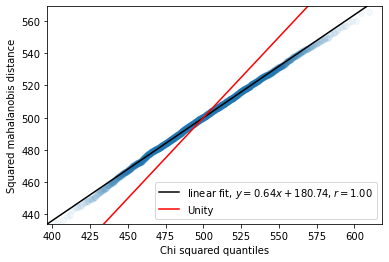

In [22]:
from scipy import stats

dim = 500
num_samples = 3000
W = stats.uniform.rvs(-1, 1, size=(num_samples, dim))

# PCA whitening
W = W - np.mean(W, axis=0)
pca = PCA(whiten=True)
W = pca.fit_transform(W)


# HZ test
hz, pval, normal = pg.multivariate_normality(W, alpha=0.05)
print('HZ test: hz statistic: {:.2f}, p-value {:.2f}, Data is normal? {}'.format(hz, pval, normal))

# Shapiro test
ws, pval = stats.shapiro(W)
normal = True if pval > 0.05 else False 
print('WS test: ws statistic: {:.2f}, p-value {:.2f}. Data is normal? {}'.format(ws, pval, normal))

# qq-plot
mu = np.mean(W, axis=0).reshape(1, -1)
dist = distance.cdist(W, mu, 'mahalanobis') ** 2
(osm, osr), (slope, intercept, r) = stats.probplot(dist.flatten(),  sparams=dim, dist=stats.chi2)
t = np.arange(0, np.max(osm), 0.5)
fig = plt.figure()
plt.plot(osm, osr, 'o', alpha=0.05)
plt.plot(t, slope * t + intercept, 'k-', label=r'linear fit, $y={:.2f}x + {:.2f}, r={:.2f}$'.format(slope, intercept, r))
plt.plot(t, t, 'r-', label='Unity')
plt.xlim(np.min(osm), np.max(osm))
plt.ylim(np.min(osr), np.max(osr))
plt.xlabel('Chi squared quantiles')
plt.ylabel('Squared mahalanobis distance')
plt.legend()

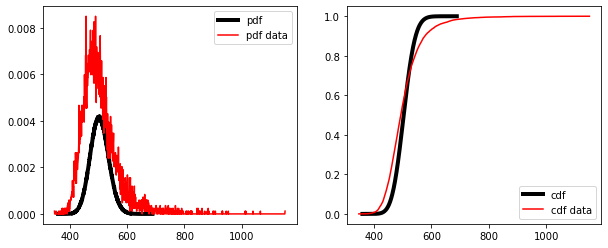

In [23]:
# check for chi squared distribution
rf = np.mean(rf_data_ni[:, snr_ni > 0.4, :], axis=0)
# rf = rf_data_wn[snr_wn > 0.4]
# rf = np.random.uniform(1, 3, size=(4000, 500))

# PCA whitening
W = rf - np.mean(rf, axis=0)
W /= np.std(W, axis=0)
pca = PCA(whiten=True)
W = pca.fit_transform(W)

mu = np.mean(W, axis=0).reshape(1, -1)
dist = distance.cdist(W, mu, 'mahalanobis') ** 2
count_data, bins_count_data = np.histogram(dist.flatten(), bins=1000)
pdf_data = count_data / sum(count_data)
cdf_data = np.cumsum(pdf_data)

# x = stats.chi2.rvs(dim_ni[0] * dim_ni[1], size=(10000, W.shape[1]))
x = stats.chi2.rvs(dim_wn[0] * dim_wn[1], size=(10000, W.shape[1]))
count, bins_count = np.histogram(x, bins=1000)
pdf = count / sum(count)
cdf = np.cumsum(pdf)


fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(121)
plt.plot(bins_count[1:], pdf, 'k-', label="pdf", lw=4)
plt.plot(bins_count_data[1:], pdf_data, 'r-', label="pdf data")
plt.legend()

ax = fig.add_subplot(122)
plt.plot(bins_count[1:], cdf, 'k-', label="cdf", lw=4)
plt.plot(bins_count_data[1:], cdf_data, 'r-', label="cdf data")
plt.legend()